In [1]:
import pandas as pd

from scipy.stats import ttest_ind, norm
from matplotlib import pyplot as plt

In [2]:
rvs1 =  norm.rvs(loc=5,scale=10,size=500)
rvs1

array([-11.73445766,  -6.1416944 ,   9.48471469,   3.92678721,
        -7.77062219,   7.30518497,   2.13916049,  24.29747456,
        15.26103516,  11.82842958,  22.22938992, -14.84757478,
        -3.66375365,  -5.49688845,  13.05257116, -13.44993242,
        14.07578847,   0.75216433,   7.39922652,  28.23287096,
         5.85522273,  21.0629963 ,   2.78080215, -14.48725772,
        14.51840541,   6.29755735,   6.48760037,  14.11500602,
        19.38395918,   2.13190373,  -1.87005462,   6.73321837,
         7.57790365,  16.6012898 ,   8.79701623,  11.39499223,
         4.92406975,   5.83151247,  10.15951281,   3.8867648 ,
         7.30785631,  11.16022571,  -5.7041525 ,  -1.15866078,
         9.3908912 ,   6.05326429,  12.91288268,  11.01040792,
        17.15372899,  -2.06424337,   6.99475614,  -4.62722686,
         3.17530185,  -5.14985831,  -6.09118334,  -4.69569719,
         8.44920776,   7.67344392,   7.91181798,   7.44557511,
       -17.92118398,   0.90353686,   7.77871685,   7.25

In [3]:
rvs2 =  norm.rvs(loc=5,scale=10,size=1000)

(array([  3.,  29.,  77., 175., 263., 241., 147.,  53.,  10.,   2.]),
 array([-28.22805683, -21.36939046, -14.51072409,  -7.65205772,
         -0.79339135,   6.06527502,  12.9239414 ,  19.78260777,
         26.64127414,  33.49994051,  40.35860688]),
 <BarContainer object of 10 artists>)

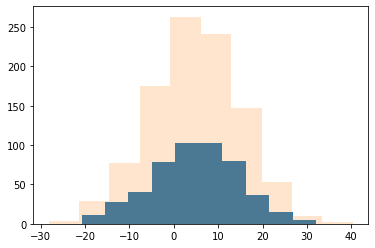

In [4]:
plt.hist(rvs1)
plt.hist(rvs2, alpha=0.2)

In [5]:
ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.00748212450071907, pvalue=0.9940311803311701)

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/Part1_Crime_2017_to_2018.csv')

In [7]:
df.shape

(100677, 19)

In [8]:
df.dtypes

objectid             int64
rowid_               int64
crimedatetime       object
crimetime           object
crimecode           object
location            object
description         object
inside_outside      object
weapon              object
post               float64
district            object
neighborhood        object
latitude           float64
longitude          float64
geolocation         object
premise             object
vriname             object
total_incidents      int64
hashedrecord        object
dtype: object

In [9]:
df['crimedatetime'] = pd.to_datetime(df['crimedatetime'])

In [11]:
df.head(3).T

,0,1,2
objectid,1,2,3
rowid_,82567,82568,82569
crimedatetime,2018-12-31 04:36:00,2018-12-31 17:30:00,2018-12-31 11:10:00
crimetime,4:36:00,17:30:00,11:10:00
crimecode,6G,6D,4E
location,400 W LEXINGTON ST,400 E 25TH ST,4200 FAIRFAX RD
description,LARCENY,LARCENY FROM AUTO,COMMON ASSAULT
inside_outside,I,O,I
weapon,NaN,NaN,NaN
post,114.0,513.0,624.0


Hypothesis: There is no significant difference between crimes inside and outsides

In [12]:
df['inside_outside'].value_counts()

O          40115
I          38355
Outside     1854
Inside       176
Name: inside_outside, dtype: int64

In [13]:
df['inside_outside'] = df['inside_outside'].replace({
    'O': 'Outside', 
    'I':'Inside'
})

In [14]:
df['inside_outside'].value_counts()

Outside    41969
Inside     38531
Name: inside_outside, dtype: int64

In [15]:
df['inside'] =  [1 if i=='Inside' else 0 for i in df['inside_outside']]
df['outside'] = [1 if i=='Outside' else 0 for i in df['inside_outside']]

In [16]:
df.head()

,objectid,rowid_,crimedatetime,crimetime,crimecode,location,description,inside_outside,weapon,post,...,neighborhood,latitude,longitude,geolocation,premise,vriname,total_incidents,hashedrecord,inside,outside
0,1,82567,2018-12-31 04:36:00,4:36:00,6G,400 W LEXINGTON ST,LARCENY,Inside,NaN,114.0,...,DOWNTOWN,39.2916,-76.6211,"(39.2916,-76.6211)",SPECIALTY STORE,NaN,1,0xC961940C8A250EDAFFBB5E3D0E48727AC79817AE9EA6...,1,0
1,2,82568,2018-12-31 17:30:00,17:30:00,6D,400 E 25TH ST,LARCENY FROM AUTO,Outside,NaN,513.0,...,HARWOOD,39.3181,-76.6110,"(39.3181,-76.611)",STREET,NaN,1,0x46FADA38EAC4E24AA9CCD81259651137A8073440F5F2...,0,1
2,3,82569,2018-12-31 11:10:00,11:10:00,4E,4200 FAIRFAX RD,COMMON ASSAULT,Inside,NaN,624.0,...,WEST FOREST PARK,39.3204,-76.6877,"(39.3204,-76.6877)",APT/CONDO - OCCUPIED,NaN,1,0xFE7A5EDB382D00C6265CB48762D75AB7D2BC374871E8...,1,0
3,4,82570,2018-12-31 19:45:00,19:45:00,4E,6500 SAINT HELENA AVE,COMMON ASSAULT,Inside,NaN,234.0,...,SAINT HELENA,39.2600,-76.5311,"(39.26,-76.5311)",ROW/TOWNHOUSE-OCC,NaN,1,0xD60C2FB5283D72C29328A7DF528251D4B0F3EF0D9474...,1,0
4,5,82571,2018-12-31 22:43:00,22:43:00,4A,2400 W BELVEDERE AVE,AGG. ASSAULT,Inside,FIREARM,532.0,...,LEVINDALE,39.3545,-76.6623,"(39.3545,-76.6623)",HOSP/NURS. HOME,NaN,1,0x3D27E5CF73522B733BA7EA512013FE1D8BE621801CC8...,1,0


In [18]:
df_io = df[['inside', 'outside']].groupby(df['crimedatetime'].dt.date).sum() # this may be count if you are counting
df_io

,inside,outside
crimedatetime,,
2017-01-01,66,62
2017-01-02,51,67
2017-01-03,40,38
2017-01-04,19,15
2017-01-05,17,21
...,...,...
2018-12-27,44,57
2018-12-28,57,65
2018-12-29,47,62


In [19]:
inside = df_io['inside']
outside = df_io['outside']  
ttest_ind(inside, outside , equal_var=False)

Ttest_indResult(statistic=-6.703280799283819, pvalue=2.9271019609461777e-11)

pvalue is less than 0.05

Let's do another example.

Null hypothesis: There is no significance different between Hampden & Canton neighborhood in terms of weapon used crimes.

In [20]:
df['weapon'].value_counts()

FIREARM    11006
OTHER       6477
KNIFE       3346
HANDS       1336
FIRE         391
Name: weapon, dtype: int64

In [21]:
df_weapon = df[df['weapon'].isna() == False]

In [22]:
hampden = df_weapon[ df_weapon['neighborhood'] == 'HAMPDEN' ]
canton = df_weapon[ df_weapon['neighborhood'] == 'CANTON' ]

In [23]:
hampden_counts = hampden['weapon'].groupby( hampden['crimedatetime'].dt.date ).count()
hampden_counts

crimedatetime
2017-01-01    3
2017-01-05    1
2017-01-08    3
2017-01-24    1
2017-01-25    1
             ..
2018-12-12    1
2018-12-15    1
2018-12-16    1
2018-12-18    4
2018-12-30    1
Name: weapon, Length: 106, dtype: int64

In [24]:
canton_counts = canton['weapon'].groupby( canton['crimedatetime'].dt.date ).count()
canton_counts

crimedatetime
2017-01-01    4
2017-01-02    2
2017-01-07    2
2017-01-12    1
2017-01-13    1
             ..
2018-12-18    1
2018-12-26    1
2018-12-29    1
2018-12-30    2
2018-12-31    1
Name: weapon, Length: 133, dtype: int64

In [25]:
ttest_ind(hampden_counts, canton_counts, equal_var=False)

Ttest_indResult(statistic=0.1379880975095151, pvalue=0.8904029753837779)

In [31]:
from random import randint

In [53]:
df = pd.DataFrame()
df['a'] = norm.rvs(loc=5,scale=10,size=500) #  [x for x in range(20)]
df['b'] = norm.rvs(loc=5,scale=10,size=500)
#df['c'] = [x-20 for x in range(20)]
df['d'] = 3

df

,a,b,d
0,9.635294,11.450293,3
1,6.631320,2.714850,3
2,1.212452,19.961766,3
3,-20.210695,-0.306794,3
4,14.068979,13.193350,3
...,...,...,...
495,12.169039,-0.584267,3
496,23.037994,-0.789684,3
497,2.017392,-11.244726,3
498,7.801188,6.727231,3


In [54]:
df[['a','b']].corr()

,a,b
a,1.000000,-0.010188
b,-0.010188,1.000000


In [61]:
df = pd.DataFrame()
df['a'] =  [x for x in range(20)]
df['b'] = [x + randint(-10, 10) for x in range(20)]
df

,a,b
0,0,-5
1,1,11
2,2,2
3,3,4
4,4,12
5,5,2
6,6,14
7,7,10
8,8,-1
9,9,0


In [62]:
df.corr()

,a,b
a,1.000000,0.651675
b,0.651675,1.000000
